## 삼성전자 주가 추이 예측

## Step 1. Preparation of Dataset

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#data read
#'data_1129_20231228.csv' : 종가 (closing price), 시장가 (market price), 고가 (high price), 저가 (low price), 거래량 (transaction amount), 시가총액 (market capitalization)등
#'data_1238_20231228.csv' : 기관, 기타법인, 외국인, 개인 매수 합계
df = pd.read_csv('data_1129_20231228.csv')
df2 = pd.read_csv('data_1238_20231228.csv')

## Step 2. Exploratory Data Analaysis

In [35]:
df.head()

,date,closing price,\nCompared to the previous day,fluctuation rate,market price,high price,low price,trading volume,transaction amount,market capitalization,Number of listed stocks
0,2023-12-27,78000,1400,1.83,76700,78000,76500,20651042,1.600120e+12,4.656430e+14,5969782550
1,2023-12-26,76600,700,0.92,76100,76700,75700,13164909,1.005440e+12,4.572850e+14,5969782550
2,2023-12-22,75900,900,1.20,75800,76300,75400,14515608,1.100290e+12,4.531060e+14,5969782550
3,2023-12-21,75000,200,0.27,74600,75000,74300,13478766,1.006940e+12,4.477340e+14,5969782550
4,2023-12-20,74800,1400,1.91,74200,74900,73800,16870156,1.253490e+12,4.465400e+14,5969782550


In [36]:
df2.head()

,date,institution total,Other legal entities,individual,foreigner,total
0,2023-12-27,7427100,179581,6326993,6717368,20651042
1,2023-12-26,7977874,126313,2343012,2717710,13164909
2,2023-12-22,7872827,191278,2621866,3829637,14515608
3,2023-12-21,5907461,99614,2322948,5148743,13478766
4,2023-12-20,10237723,80411,2603258,3948764,16870156


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           247 non-null    object 
 1   closing price                  247 non-null    int64  
 2   
Compared to the previous day  247 non-null    int64  
 3   fluctuation rate               247 non-null    float64
 4   market price                   247 non-null    int64  
 5   high price                     247 non-null    int64  
 6   low price                      247 non-null    int64  
 7   trading volume                 247 non-null    int64  
 8   transaction amount             247 non-null    float64
 9   market capitalization          247 non-null    float64
 10  Number of listed stocks        247 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 21.4+ KB


In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date                  247 non-null    object
 1   institution total     247 non-null    int64 
 2   Other legal entities  247 non-null    int64 
 3   individual            247 non-null    int64 
 4   foreigner             247 non-null    int64 
 5   total                 247 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 11.7+ KB


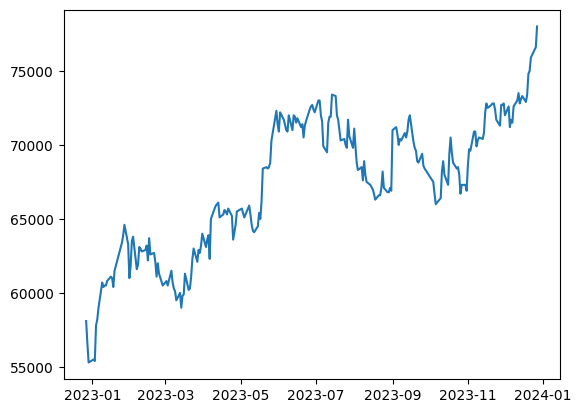

In [39]:
date_time = pd.to_datetime(df['date'])
data = pd.DataFrame(df['closing price'])
data = data.set_index(date_time)
plt.plot(data)
plt.show()


In [40]:
df2.drop(['date'], axis=1, inplace=True)

In [41]:
new_data = pd.concat([df, df2], axis=1)

In [42]:
new_data.head()

,date,closing price,\nCompared to the previous day,fluctuation rate,market price,high price,low price,trading volume,transaction amount,market capitalization,Number of listed stocks,institution total,Other legal entities,individual,foreigner,total
0,2023-12-27,78000,1400,1.83,76700,78000,76500,20651042,1.600120e+12,4.656430e+14,5969782550,7427100,179581,6326993,6717368,20651042
1,2023-12-26,76600,700,0.92,76100,76700,75700,13164909,1.005440e+12,4.572850e+14,5969782550,7977874,126313,2343012,2717710,13164909
2,2023-12-22,75900,900,1.20,75800,76300,75400,14515608,1.100290e+12,4.531060e+14,5969782550,7872827,191278,2621866,3829637,14515608
3,2023-12-21,75000,200,0.27,74600,75000,74300,13478766,1.006940e+12,4.477340e+14,5969782550,5907461,99614,2322948,5148743,13478766
4,2023-12-20,74800,1400,1.91,74200,74900,73800,16870156,1.253490e+12,4.465400e+14,5969782550,10237723,80411,2603258,3948764,16870156


In [43]:
new_data.columns

Index(['date', 'closing price', '\nCompared to the previous day',
       'fluctuation rate', 'market price', 'high price', 'low price',
       'trading volume', 'transaction amount', 'market capitalization',
       'Number of listed stocks', 'institution total', 'Other legal entities',
       'individual', 'foreigner', 'total'],
      dtype='object')

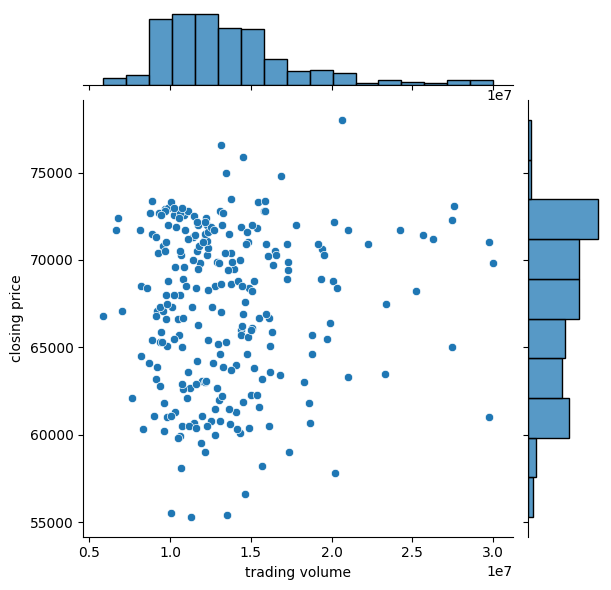

In [46]:
sns.jointplot(x='trading volume', y='closing price', data=new_data, kind='scatter')

## Step 3. Data-Preprocessing

In [47]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           247 non-null    object 
 1   closing price                  247 non-null    int64  
 2   
Compared to the previous day  247 non-null    int64  
 3   fluctuation rate               247 non-null    float64
 4   market price                   247 non-null    int64  
 5   high price                     247 non-null    int64  
 6   low price                      247 non-null    int64  
 7   trading volume                 247 non-null    int64  
 8   transaction amount             247 non-null    float64
 9   market capitalization          247 non-null    float64
 10  Number of listed stocks        247 non-null    int64  
 11  institution total              247 non-null    int64  
 12  Other legal entities           247 non-null    int

In [48]:
from sklearn.preprocessing import StandardScaler

In [91]:
scaler = StandardScaler()

x_num = new_data.drop(['date', 'closing price', 'market price', 'high price', 'low price', 'total', 'Number of listed stocks', 'market capitalization'], axis=1)
scaler.fit(x_num)
x_scaled = scaler.transform(x_num)
x = pd.DataFrame(x_scaled, index=x_num.index, columns=x_num.columns)

y = df['closing price']


<Axes: >

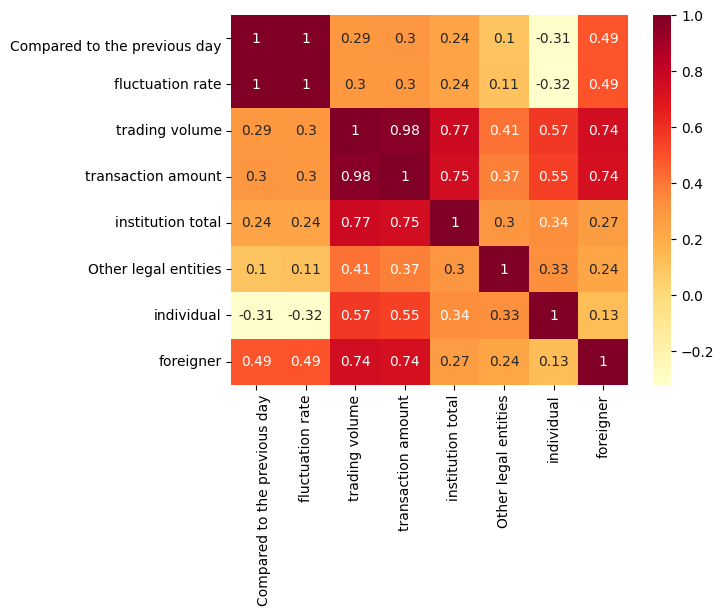

In [93]:
sns.heatmap(x_num.corr(), annot=True, cmap='YlOrRd', annot_kws={"size": 10})

In [94]:
x.head()

,\nCompared to the previous day,fluctuation rate,trading volume,transaction amount,institution total,Other legal entities,individual,foreigner
0,1.4940,1.271688,1.651656,2.273508,0.412502,1.529398,2.889821,0.852605
1,0.7009,0.591155,-0.088420,0.308411,0.665784,0.838203,0.039325,-0.809319
2,0.9275,0.800550,0.225536,0.621839,0.617476,1.681176,0.238842,-0.347295
3,0.1344,0.105061,-0.015467,0.313368,-0.286326,0.491762,0.024969,0.200815
4,1.4940,1.331515,0.772827,1.128082,1.705009,0.242588,0.225528,-0.297796


In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=1)

## Step 4. Learning Model

In [97]:
from xgboost import XGBRegressor

In [98]:
model_reg = XGBRegressor()
model_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [100]:
pred = model_reg.predict(x_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

2993.713195447977
3915.9081831609346


## Step 5. Analysis of Model Performance

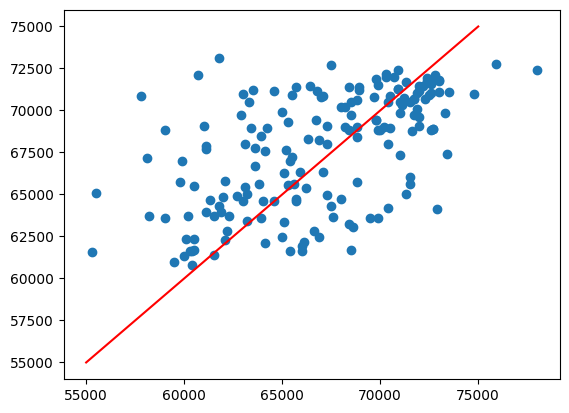

In [103]:
plt.scatter(x=y_test, y=pred, alpha=1)
plt.plot([55000, 75000], [55000, 75000], 'r-')

In [102]:
data = x_test
pred2 = model_reg.predict(data[1:4])
y_test2 = y_test[0:3]
pred2-y_test[0:3]

67     -4826.531250
246     4219.406250
209    10995.765625
Name: closing price, dtype: float64

In [74]:
y_test2

67     72000
246    58100
209    62100
Name: closing price, dtype: int64